In [1]:
#We have used Numpy, pandas, Seaborn, Matplotlib.

import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************
import pandas as pd
import numpy as np


pd.options.display.width= None
pd.options.display.max_columns= None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)


In [2]:
# ************** DATA VISUALIZATION ****************
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
df= pd.read_csv("adult_uci.csv", delimiter=",", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
col_list = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]


In [5]:
len(col_list)

15

In [6]:
df.columns = col_list

In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# general Info abput dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [10]:
#Summary statistics about numerical variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
df.shape

(32561, 15)

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
#creating copy of dataset
df_copy = df.copy()

In [14]:
# checking if any null values are present in the dataset

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# No null values are present

In [15]:
# checking unique values for each columns
for col in col_list:
    print(col)
    print(df[col].unique())
    print("*"*100)

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
****************************************************************************************************
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
****************************************************************************************************
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
****************************************************************************************************
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
********************************************************************************

In [16]:
#there are some values "?". Lets check what are they and how many of these values are there in dataset
df[df['workclass'] == " ?"].head(40)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


# Value Counts Function

In [17]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [18]:
# Lets calculate percentage of this values in the dataset
workclass = df["workclass"]
(workclass[df['workclass'] == " ?"].count()/ df.shape[0]) * 100

5.638647461687294

# since percentage of these values are approximately 6%, we can drop these values from dataset for variable workclass

In [19]:

df.drop(df[df.workclass == " ?"].index, inplace=True)

In [20]:
# checking if any occupation with "?" values
df[df['workclass'] == " ?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [21]:
#there are some values "?". Lets check what are they and how many of these values are there for variable occupation
df[df['occupation'] == " ?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [22]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: occupation, dtype: int64

In [23]:
# since some rows have workclass as "Never-worked", we can replace "?" value with no-occupation for these rows

df['occupation'] = df['occupation'].replace({" ?": " no-occupation"})

In [24]:
# checking if any occupation with "?" values

df[df['occupation'] == " ?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [25]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


###  there were 3 columns, Workclass, Occupation, and Native-country that have "?" values, we have handles two columns i.e. Workclass and Occupation.
## Lets handle  Native-country column

In [26]:
# First calculate the percentage of "?" values in dataset for vairable native-country
native_country = df["native-country"]
(native_country[df['native-country'] == " ?"].count()/ df.shape[0]) * 100

1.8096013018714403

In [27]:
df['native-country'].mode()

0     United-States
Name: native-country, dtype: object

In [28]:
df_race = df.groupby('race')['native-country'].value_counts().to_frame()
df_race

native-country
race                native-country                             
 Amer-Indian-Eskimo  United-States                          271
                     Mexico                                   8
                     South                                    2
                     Columbia                                 1
                     Germany                                  1
                     Hong                                     1
                     Philippines                              1
                     Puerto-Rico                              1
 Asian-Pac-Islander  United-States                          273
                     Philippines                            178
                     India                                   85
                     ?                                       79
                     South                                   68
                     China                                   66
                     Vietnam                                 62
                     Taiwan                                  40
                     Japan                                   37
                     Cambodia                                18
                     Laos                                    17
                     Hong                                    16
                     Thailand                                15
                     Iran                                     6
                     Germany                                  2
                     Trinadad&Tobago                          2
                     Canada                                   1
                     Dominican-Republic                       1
                     England                                  1
                     Greece                                   1
                     Haiti                                    1
                     Ireland                                  1
                     Mexico                                   1
                     Poland                                   1
                     Portugal                                 1
                     Puerto-Rico                              1
 Black               United-States                         2631
                     ?                                       92
                     Jamaica                                 74
                     Haiti                                   41
                     Trinadad&Tobago                         15
                     Dominican-Republic                      12
                     Puerto-Rico                              9
                     England                                  7
                     Germany                                  6
                     Outlying-US(Guam-USVI-etc)               6
                     Mexico                                   4
                     Cuba                                     3
                     Japan                                    3
                     India                                    2
                     Nicaragua                                2
                     El-Salvador                              1
                     France                                   1
                     Honduras                                 1
                     Philippines                              1
 Other               United-States                          113
                     Mexico                                  38
                     Puerto-Rico                             20
                     Dominican-Republic                      18
                     ?                                       17
                     Ecuador                                  9
                     Columbia                                 6
                     India                                    5
                 

In [29]:
# replacing ? with mode value i.e., United-States
df['native-country'] = df['native-country'].replace({" ?": " United-States"})

In [30]:
#Checking if it still contains the ? values for native-country column
df[df['native-country'] == "?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [31]:
df['native-country'].unique() # No ? values

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [32]:
df['sex'].value_counts()

 Male      20793
 Female     9932
Name: sex, dtype: int64

In [33]:
df['income'].value_counts()

 <=50K    23075
 >50K      7650
Name: income, dtype: int64

In [34]:
df['race'].value_counts()

 White                 26306
 Black                  2911
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

In [35]:
#Skewness and Kurtosis

In [36]:
numerics = ['int64']
num_df = df.select_dtypes(include=numerics)
num_cols = num_df.columns.tolist()

In [37]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [38]:
#Skewness and Kurtosis of all numeric variable
def call_Skew_kurt(dataframe, col):
    print(f"Skewness for column {col} is %f " % df[col].skew())
    print(f"Kurtosis for column {col} is %f " % df[col].kurt())
    print("*"*100)

In [39]:
for x in num_cols:
    call_Skew_kurt(df, x)

Skewness for column age is 0.531668 
Kurtosis for column age is -0.137335 
****************************************************************************************************
Skewness for column fnlwgt is 1.457197 
Kurtosis for column fnlwgt is 6.360369 
****************************************************************************************************
Skewness for column education-num is -0.310258 
Kurtosis for column education-num is 0.630359 
****************************************************************************************************
Skewness for column capital-gain is 11.787237 
Kurtosis for column capital-gain is 150.314321 
****************************************************************************************************
Skewness for column capital-loss is 4.514917 
Kurtosis for column capital-loss is 19.406765 
****************************************************************************************************
Skewness for column hours-per-week is 0.330749 
Kurtosis 

<AxesSubplot:xlabel='income', ylabel='count'>

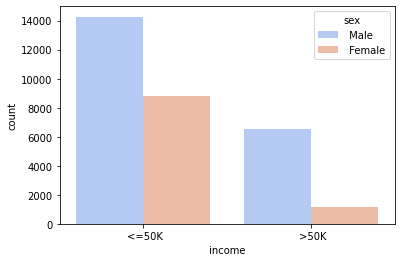

In [40]:
sns.countplot(df['income'],palette='coolwarm',hue='sex',data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

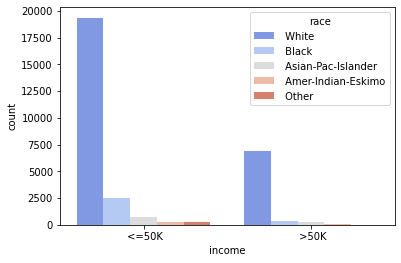

In [41]:
sns.countplot(df['income'],palette='coolwarm',hue='race',data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

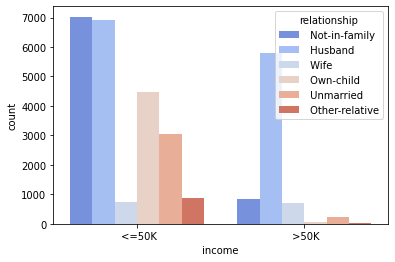

In [42]:
sns.countplot(df['income'],palette='coolwarm',hue='relationship',data=df)

In [43]:
df['income'] = df['income'].replace({" <=50K": 0, " >50K": 1})
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [44]:
num_corr = df.corr()
num_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.043884,0.080420,0.060463,0.102192,0.242546
fnlwgt,-0.076628,1.000000,-0.043515,-0.000200,-0.010026,-0.022761,-0.009489
education-num,0.043884,-0.043515,1.000000,0.124257,0.079357,0.151367,0.334697
capital-gain,0.080420,-0.000200,0.124257,1.000000,-0.032325,0.079560,0.221882
capital-loss,0.060463,-0.010026,0.079357,-0.032325,1.000000,0.053998,0.151483
hours-per-week,0.102192,-0.022761,0.151367,0.079560,0.053998,1.000000,0.228611
income,0.242546,-0.009489,0.334697,0.221882,0.151483,0.228611,1.000000


<AxesSubplot:>

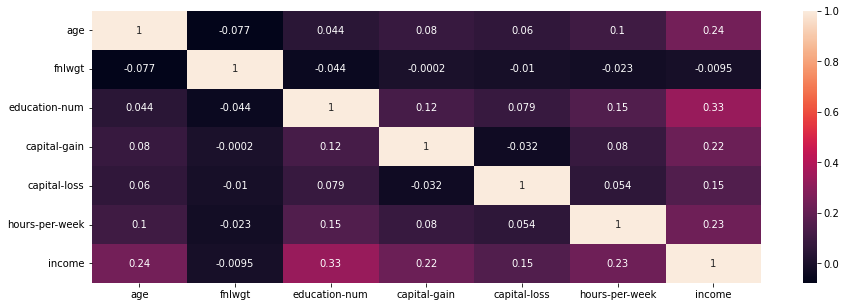

In [45]:
plt.figure(figsize=(15,5))
sns.heatmap(num_corr, annot=True)


In [46]:
# Here we can take those features for modeling that have more than 10% correlation with income
highly_correlated_num_features = [x for x in num_corr[abs(num_corr['income']) > 0.10].index.tolist() if x != 'income']


In [47]:
highly_correlated_num_features

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Below are numerical features that have correlation more than 10% with income feature

### Age
### Education-num
### capital-gain
### capital-loss
### hours-per-week

# Outliers identification 

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

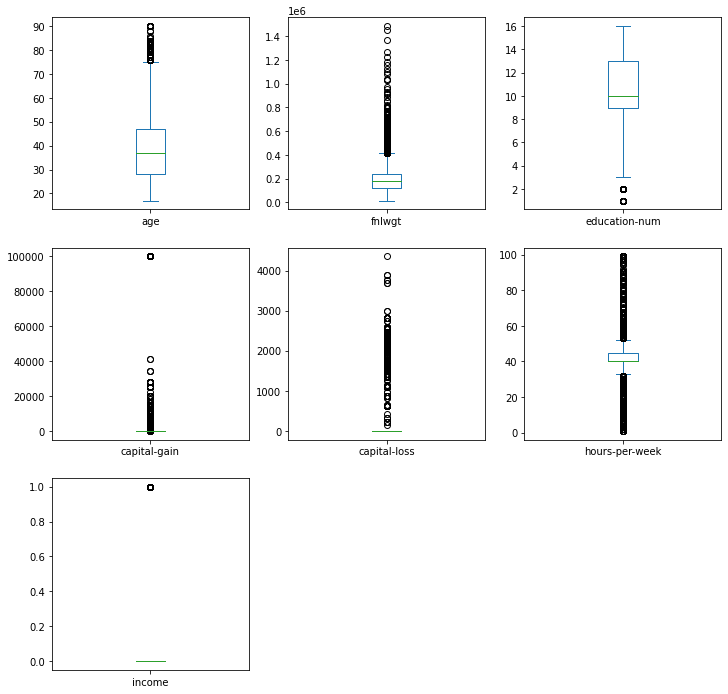

In [48]:
#using box plot
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

<Figure size 1080x360 with 0 Axes>

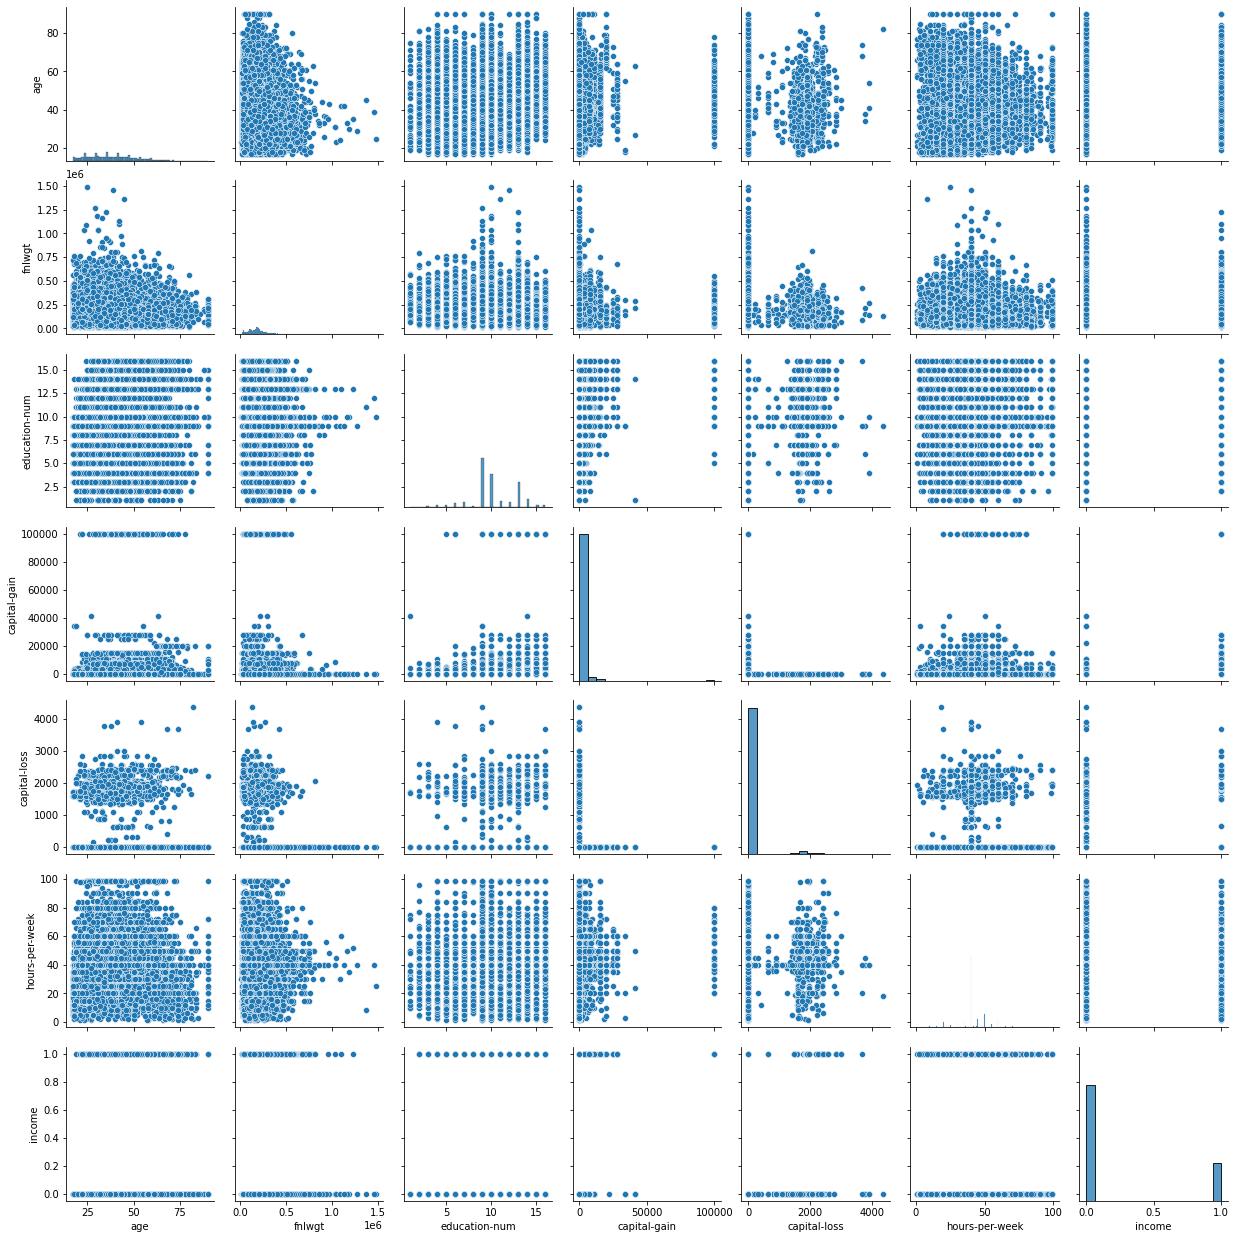

In [49]:
# Pair Plot for numerical columns with income 

plt.figure(figsize=(15,5))
sns.pairplot(df)

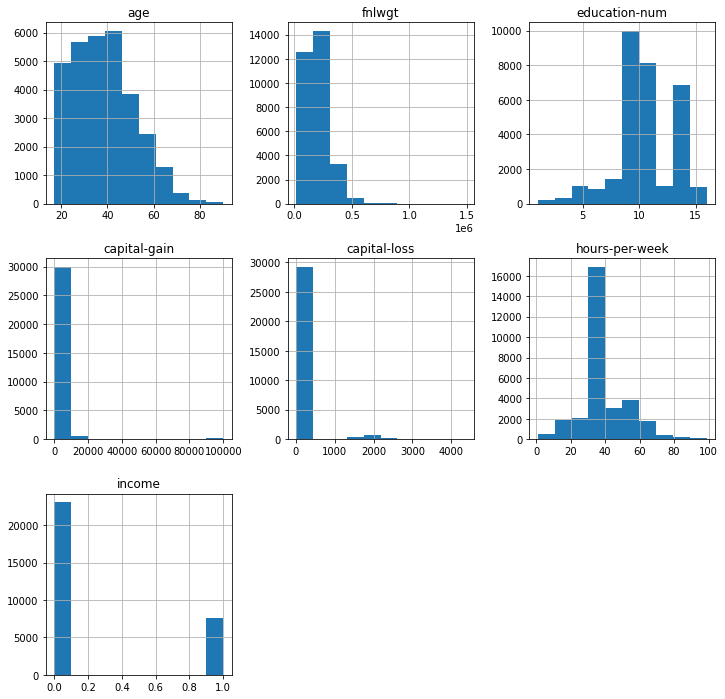

In [50]:
#Histogram

df.hist(figsize=(12,12), layout = (3,3), sharex=False);


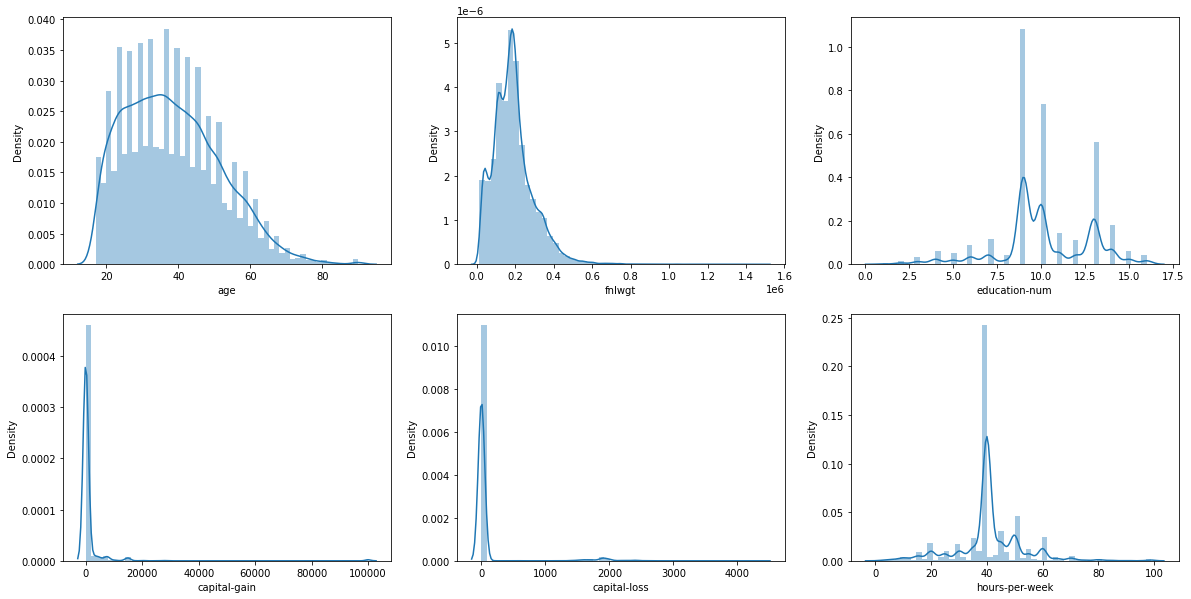

In [51]:
num_cols= ["age","fnlwgt","education-num","capital-gain", "capital-loss", "hours-per-week"]
rows = 2
cols = 3
index = 0
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
for i in range(rows):
    for j in range(cols):
        dist = sns.distplot(x=df[num_cols[index]], ax=ax[i][j])
        dist.set(xlabel=num_cols[index], ylabel="Density")
        index = index + 1

## Outliers identification using IQR(Interquartile Range)

In [52]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [53]:
# Calculating IQR Range for numerical columns

def calIQR(dataframe, col):
    q1 = np.percentile(dataframe[col], 25)
    q3 = np.percentile(dataframe[col], 75)
    iqr = q3 - q1
    print(f"IQR for column {col} is {iqr}")
    # calculating range for colum
    Q1 = q1 - 1.5 * iqr
    Q3 = q3 + 1.5* iqr
    print(f"Threashold Range for column {col} where lower limit Q1 = {Q1} and upper limit Q3 = {Q3}")
    
    outliers_poss = []
    for index, x in enumerate(dataframe[col]):
        if x <= Q1 or x >= Q3:
            outliers_poss.append(index)
    print(f"Total no of outliers for {col} are",len(outliers_poss))   
#   lower = dataframe[col]<=Q1
#   upper = dataframe[col]>=Q3
#   print(f"outliers in lower limit for {col} are %f " % np.where(lower))
#   print(f"outliers in upper limit for {col} are %f " % np.where(upper))
    print("*"*100)

In [54]:
for x in num_cols:
    calIQR(df, x)

IQR for column age is 19.0
Threashold Range for column age where lower limit Q1 = -0.5 and upper limit Q3 = 75.5
Total no of outliers for age are 172
****************************************************************************************************
IQR for column fnlwgt is 119484.0
Threashold Range for column fnlwgt where lower limit Q1 = -61393.0 and upper limit Q3 = 416543.0
Total no of outliers for fnlwgt are 927
****************************************************************************************************
IQR for column education-num is 4.0
Threashold Range for column education-num where lower limit Q1 = 3.0 and upper limit Q3 = 19.0
Total no of outliers for education-num are 505
****************************************************************************************************
IQR for column capital-gain is 0.0
Threashold Range for column capital-gain where lower limit Q1 = 0.0 and upper limit Q3 = 0.0
Total no of outliers for capital-gain are 30725
**********************

## Outliers Treatment


In [55]:
#Flooring and Capping method for outliers removal
def call_floor_capp(dataframe, col):
    print(f" 10th percentile for {col} is %f " % df[col].quantile(0.10))
    print(f" 90th percentile for {col} is %f " % df[col].quantile(0.90))
    print("*"*100)

In [56]:
for x in num_cols:
    call_floor_capp(df, x)

 10th percentile for age is 22.000000 
 90th percentile for age is 57.000000 
****************************************************************************************************
 10th percentile for fnlwgt is 66299.800000 
 90th percentile for fnlwgt is 328608.400000 
****************************************************************************************************
 10th percentile for education-num is 7.000000 
 90th percentile for education-num is 13.000000 
****************************************************************************************************
 10th percentile for capital-gain is 0.000000 
 90th percentile for capital-gain is 0.000000 
****************************************************************************************************
 10th percentile for capital-loss is 0.000000 
 90th percentile for capital-loss is 0.000000 
****************************************************************************************************
 10th percentile for hours-per-week is 25

In [57]:
# for age
df["age"] = np.where(df["age"] <22.0, 22.0,df['age'])
df["age"] = np.where(df["age"] >57.0, 57.0,df['age'])
print(df['age'].skew())

0.20719394794979065


In [58]:
# for fnlwgt
df["fnlwgt"] = np.where(df["fnlwgt"] <66299.800000, 66299.800000,df['fnlwgt'])
df["fnlwgt"] = np.where(df["fnlwgt"] >328608.400000, 328608.400000,df['fnlwgt'])
print(df['fnlwgt'].skew())

0.3167798737402999


In [59]:
# for education-num
df["education-num"] = np.where(df["education-num"] <7.000000, 7.000000,df['education-num'])
df["education-num"] = np.where(df["education-num"] >13.000000, 13.000000,df['education-num'])
print(df['education-num'].skew())

0.21328260201988825


In [60]:
# for capital-gain
df["capital-gain"] = np.where(df["capital-gain"] <0.0, 0.0,df['capital-gain'])
df["capital-gain"] = np.where(df["capital-gain"] >0.0, 0.0,df['capital-gain'])
print(df['capital-gain'].skew())

0


In [61]:
# for capital-loss
df["capital-loss"] = np.where(df["capital-loss"] <0.0, 0.0,df['capital-loss'])
df["capital-loss"] = np.where(df["capital-loss"] >0.0, 0.0,df['capital-loss'])
print(df['capital-loss'].skew())

0


In [62]:
# for hours-per-week
df["hours-per-week"] = np.where(df["hours-per-week"] <25.00, 25.00,df['hours-per-week'])
df["hours-per-week"] = np.where(df["hours-per-week"] >55.00, 55.00,df['hours-per-week'])
print(df['hours-per-week'].skew())

-0.15548827315985705


age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

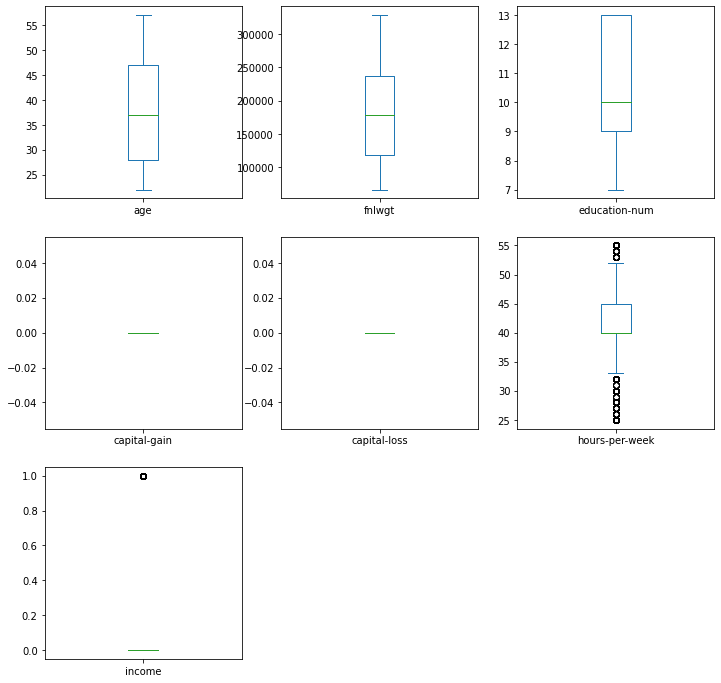

In [63]:
#using box plot
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

<Figure size 1080x360 with 0 Axes>

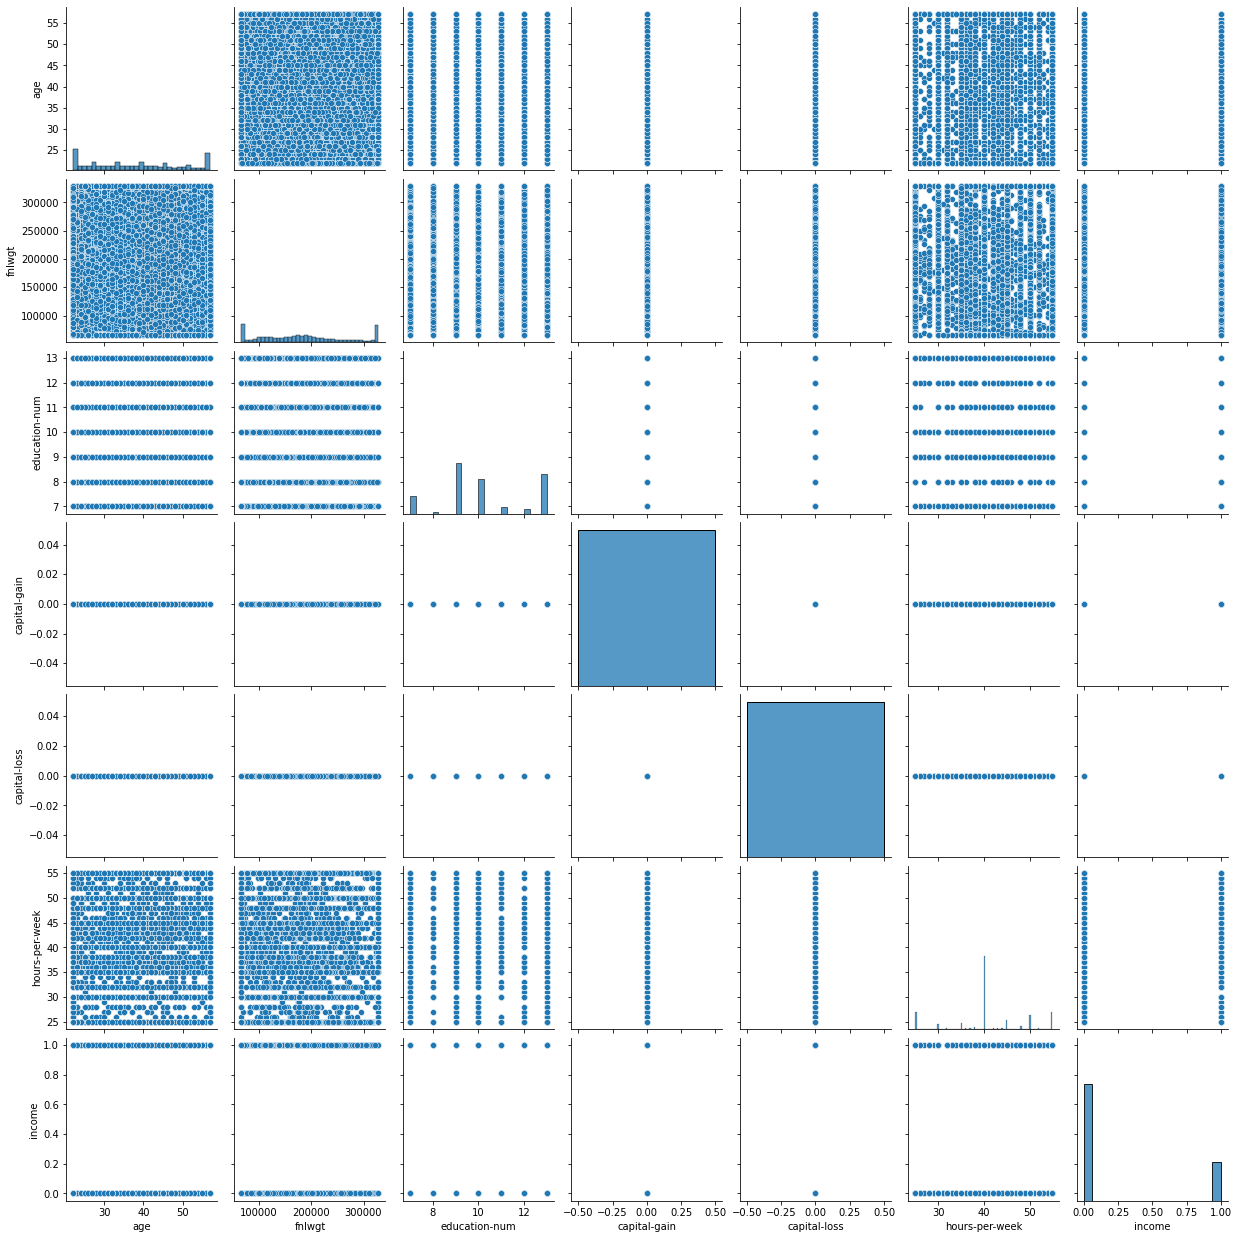

In [64]:

# Pair Plot for numerical columns with income 

plt.figure(figsize=(15,5))
sns.pairplot(df)

# Histogram

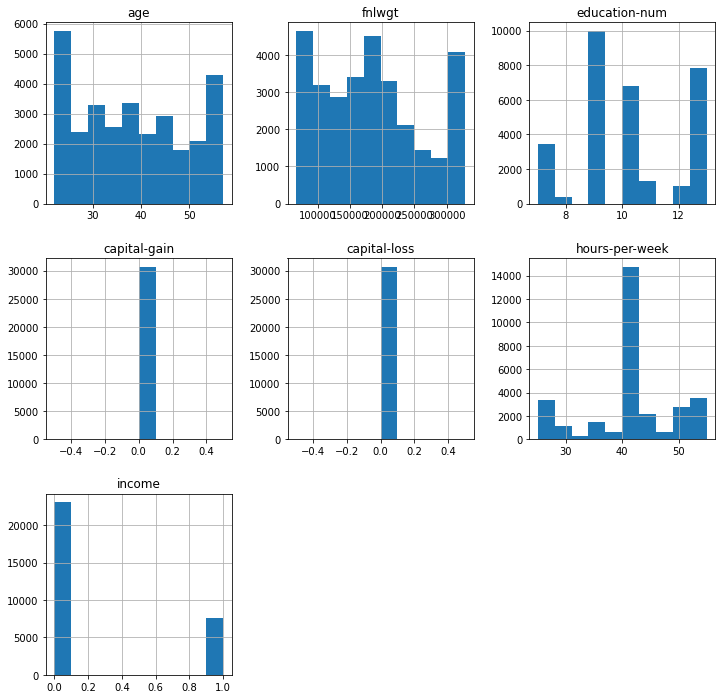

In [65]:
#Histogram

df.hist(figsize=(12,12), layout = (3,3), sharex=False);

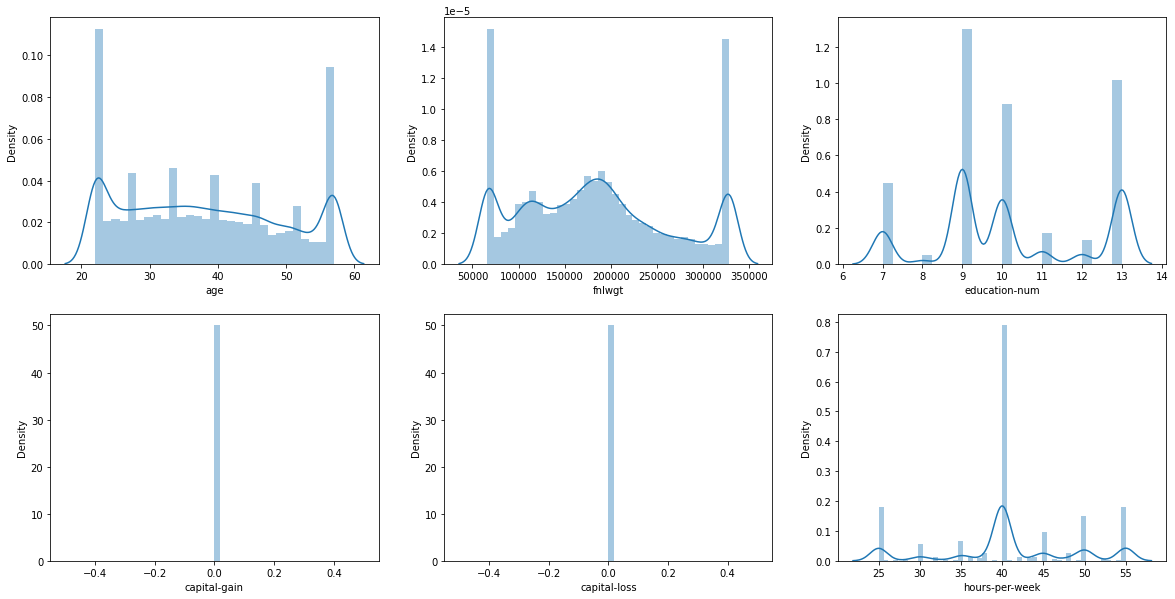

In [66]:
num_cols= ["age","fnlwgt","education-num","capital-gain", "capital-loss", "hours-per-week"]
rows = 2
cols = 3
index = 0
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
for i in range(rows):
    for j in range(cols):
        dist = sns.distplot(x=df[num_cols[index]], ax=ax[i][j])
        dist.set(xlabel=num_cols[index], ylabel="Density")
        index = index + 1

# Model Building

In [67]:

X= df.drop(['income'], axis=1)
y = df['income']

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [69]:
df1= df.copy()#Precision: tp/tp+fp

print('Precision =' , 10332/(10332+1286))
    
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

Precision = 0.8893096918574626


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,6,437,9,6,4,0,1,4,1,0,0,15,38,0
1,28,5,674,9,6,2,3,0,4,1,0,0,0,38,0
2,16,3,11252,11,2,0,5,1,4,1,0,0,15,38,0
3,31,3,12444,1,0,2,5,0,2,1,0,0,15,38,0
4,6,3,16003,9,6,2,9,5,2,0,0,0,15,4,0


In [70]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [71]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.805
Acc on test data: 0.797


# Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 0.998
Acc on test data: 0.820


In [75]:
#Precision: tp/tp+fp

print('Precision =' , 10332/(10332+1286))
# recall= tp/tp+fn

print('Recall =', 10332/(10332+806))

Precision = 0.8893096918574626
Recall = 0.9276351230023343
